<a href="https://colab.research.google.com/github/hscrown/paper_reading/blob/main/LeNet_5_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EB%A1%9C_%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tensorflow와 LeNet-5으로 FashionMNIST 데이터 분류하기

0. 데이터 전처리

In [1]:
# tensorflow와 keras 임포트
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.17.0


In [2]:
# 데이터 로드 및 스플릿
fashion_mnist = keras.datasets.fashion_mnist
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# 클래스 이름 정의
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# 데이터 정규화
print(np.min(train_X[0]))
print(np.max(train_X[0]))

train_X = train_X / 255.0
test_X = test_X / 255.0


0
255


In [5]:
# 데이터 reshape
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# reshape 이후
print(train_X.shape, test_X.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


LeNet-5

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [7]:
import tensorflow as tf

# LeNet-5 모델 정의
model = tf.keras.Sequential([
    # 첫 번째 Conv 레이어
    # 입력 이미지의 크기는 28x28 픽셀이며, 흑백 이미지이므로 채널은 1개임
    # 이 레이어에서는 6개의 5x5 필터를 사용하여 입력 이미지의 로컬 특징을 추출
    # 활성화 함수로 'tanh'를 사용하여 비선형성을 추가
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1)),

    # 첫 번째 Pooling 레이어
    # Average Pooling을 사용하여 출력 크기를 줄이고, 중요한 특징을 유지하면서 계산량 감소
    # pool_size=(2, 2), strides=(2, 2)를 사용하여 2x2 영역의 평균값을 구함
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),

    # 두 번째 Conv 레이어
    # 16개의 5x5 필터를 적용하여 더 복잡한 특징을 학습
    # 앞 레이어에서 추출한 저수준 특징을 조합해 고수준 특징을 학습할 수 있게 함
    # 'tanh' 활성화 함수로 비선형성을 추가
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'),

    # 두 번째 Pooling 레이어
    # Average Pooling을 사용해 특징 맵의 크기를 줄이며, 학습 속도를 높임
    # pool_size와 strides를 통해 2x2 영역에서 평균값을 계산해 특성 맵 크기를 줄임
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),

    # Flatten 레이어
    # Conv 레이어에서 추출된 다차원 출력을 1차원으로 펼쳐 Fully Connected 레이어에 전달
    # Fully Connected 레이어로 입력하기 위한 전처리 단계
    tf.keras.layers.Flatten(),

    # 첫 번째 Fully Connected 레이어
    # 120개의 뉴런으로 구성되어 있으며, 학습된 특징을 사용해 고차원 특징을 학습
    # 'tanh' 활성화 함수 사용으로 비선형성 추가
    tf.keras.layers.Dense(units=120, activation='tanh'),

    # 두 번째 Fully Connected 레이어
    # 84개의 뉴런을 사용하며, 첫 번째 Fully Connected 레이어에서 학습한 특징을 더욱 추상화
    # 'tanh' 활성화 함수 사용으로 비선형성 추가
    tf.keras.layers.Dense(units=84, activation='tanh'),

    # 출력 레이어
    # 최종적으로 10개의 뉴런을 사용하여 10개의 클래스 확률을 출력
    # softmax 활성화 함수를 사용하여 각 클래스에 대한 확률을 계산
    tf.keras.layers.Dense(units=10, activation='softmax')
])

# 모델 컴파일
# Adam 옵티마이저 사용: 경사하강법을 기반으로 학습 속도를 자동으로 조정해 효율적인 학습을 도움
# 손실 함수로 sparse_categorical_crossentropy 사용: 다중 클래스 분류 문제에 적합
# metrics로 'accuracy'를 설정하여, 모델의 예측 정확도를 평가
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 구조 요약 정보 출력
# 각 레이어의 출력 형태와 파라미터 수를 보여줌
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(train_X, train_y, epochs=3, validation_split=0.25)

Epoch 1/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.7165 - loss: 0.7682 - val_accuracy: 0.8212 - val_loss: 0.4811
Epoch 2/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8421 - loss: 0.4356 - val_accuracy: 0.8544 - val_loss: 0.4014
Epoch 3/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8589 - loss: 0.3896 - val_accuracy: 0.8605 - val_loss: 0.3772


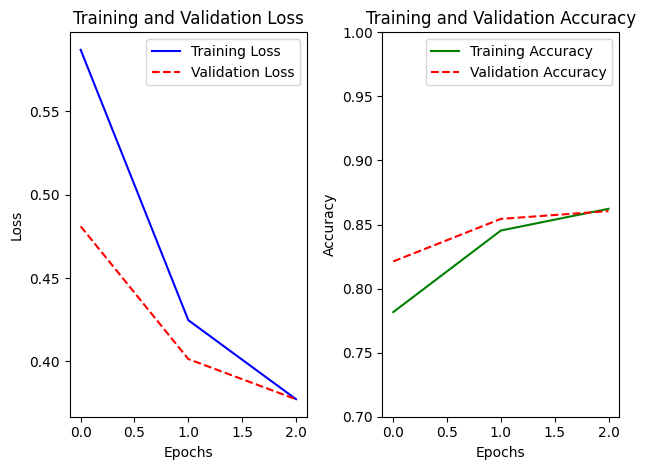

Test Loss: 0.4032338559627533, Test Accuracy: 0.8511000275611877


In [9]:
# 결과 시각화


# 그래프 설정: 학습 및 검증 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='Training Loss')
plt.plot(history.history['val_loss'], 'r--', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# 그래프 설정: 학습 및 검증 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)  # y축 범위 조정
plt.title('Training and Validation Accuracy')
plt.legend()

# 그래프 표시
plt.tight_layout()  # 그래프 간격 조정
plt.show()

# 모델 성능 평가
test_loss, test_accuracy = model.evaluate(test_X, test_y, verbose=0)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")